# Calculate_error Notebook

- What: Calculate error between predictions for machine learning models
- Why: Identify models to use in ensemble learning. High error between machine learning models is desired among models used for ensemble learning as this could ultimately reduce overfitting and bias.


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.DataFrame()
df_catboost = pd.read_csv('../catboost/predictions.csv')
df_xgboost = pd.read_csv('../xgboost/predictions_5.csv')

In [128]:
df['predictions_catboost'] = df_catboost['prediction']
df['predictions_xgboost'] = df_xgboost['prediction']
df['error'] = df['predictions_catboost'] - df['predictions_xgboost']

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['error'] = scaler.fit_transform(df[['error']])

In [130]:
split_size = len(df) // 3

df_a = df.iloc[:split_size]
df_b = df.iloc[split_size:2*split_size]
df_c = df.iloc[2*split_size:]

In [131]:
start_date = '2023-05-01 00:00:00'
end_date = '2023-05-30 23:00:00'
hourly_index = pd.date_range(start=start_date, end=end_date, freq='H')

df_a.index = hourly_index
df_b.index = hourly_index
df_c.index = hourly_index

In [134]:
df_a['location']='A'
df_b['location']='B'
df_c['location']='C'

df_a['dayofweek'] = df_a.index.dayofweek
df_b['dayofweek'] = df_b.index.dayofweek
df_c['dayofweek'] = df_c.index.dayofweek

df = pd.concat([df_a, df_b, df_c])
df = df.sort_index()

# Results & Visualizations

In [145]:
error_a = round(np.mean(df_a['error']), 2)
error_b = round(np.mean(df_b['error']), 2)
error_c = round(np.mean(df_c['error']), 2)

print('Mean CatBoost - XGBoost for location A:= ' + str(error_a))
print('Mean CatBoost - XGBoost for location B:= ' + str(error_b))
print('Mean CatBoost - XGBoost for location C:= ' + str(error_c))

Mean CatBoost - XGBoost for location A:= 0.54
Mean CatBoost - XGBoost for location B:= 0.58
Mean CatBoost - XGBoost for location C:= 0.58


## Boxplot

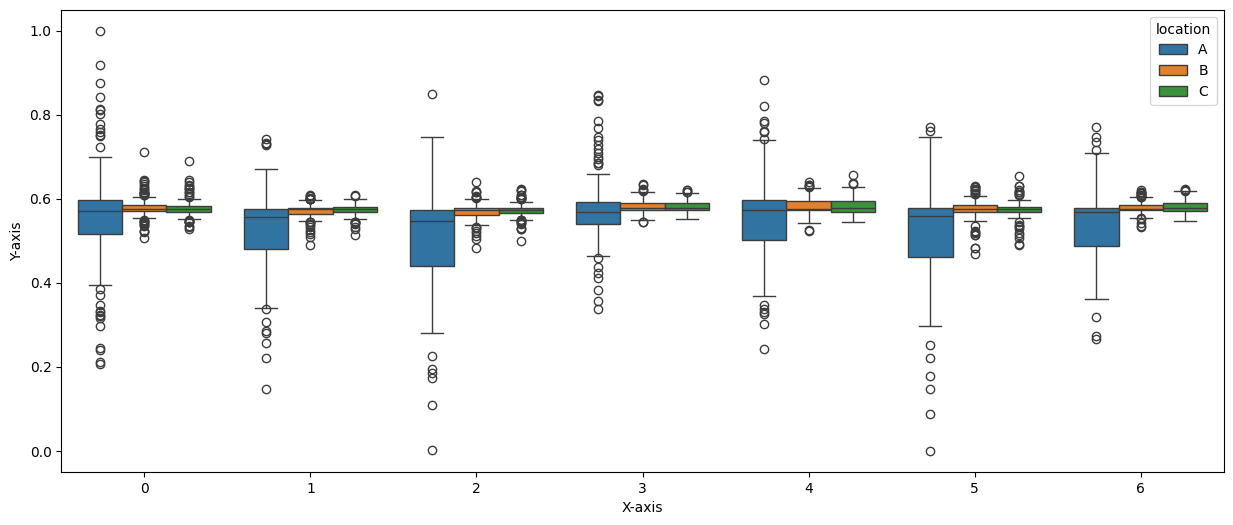

In [135]:
# Plotting
plt.figure(figsize=(15,6))

sns.boxplot(x='dayofweek', y='error', hue='location', data=df)

plt.title('predictions_CatBoost - predictions_XGBoost')
plt.xlabel("Error")
plt.ylabel("DayOfWeek")
plt.show()

## Scatterplot

<function matplotlib.pyplot.show(close=None, block=None)>

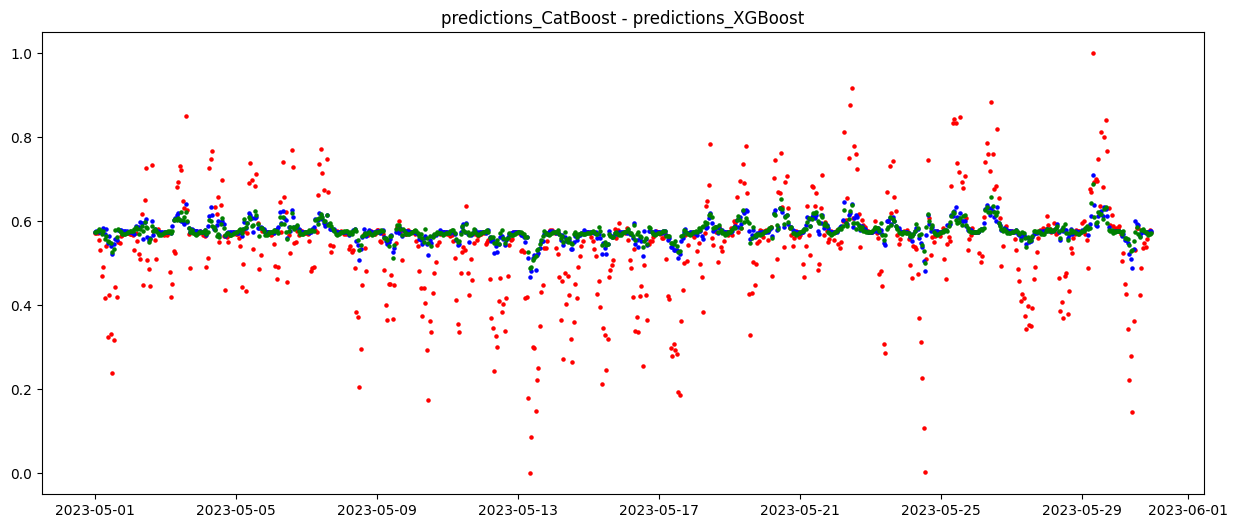

In [136]:
plt.figure(figsize=(15,6))


plt.scatter(x=df_a.index, y=df_a['error'], s=5, label='location A', color='red')
plt.scatter(x=df_b.index, y=df_b['error'], s=5, label='location B', color='blue')
plt.scatter(x=df_c.index, y=df_c['error'], s=5, label='location C', color='green')

plt.title('predictions_CatBoost - predictions_XGBoost')
plt.xlabel("Error")
plt.ylabel("Hourly data")

plt.show